In [93]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno

go straight to zillow monthly header

# CENSUS (resident characteristics)

In [168]:
cen = pd.read_csv("Untitled/census_long.csv")
cen.head()

,zcta,date,household_income,household_income_prior,household_income_delta,pct_below_pov_line,pct_below_pov_line_prior,pct_below_pov_line_delta,total_pop,total_pop_delta,...,pct_over_65,pct_over_65_prior,pct_over_65_delta,pct_vacancy,pct_vacancy_prior,pct_vacancy_delta,pct_owner_occupied,pct_mortgage,pct_sfh,total_rental_homes
0,601,201301,12000.0,NaN,NaN,0.591,NaN,NaN,18400,NaN,...,0.141,NaN,NaN,0.176,NaN,NaN,0.623,0.185,0.854,2180.0
1,601,201401,10800.0,NaN,NaN,0.609,NaN,NaN,18100,NaN,...,0.148,NaN,NaN,0.187,NaN,NaN,0.568,0.183,0.855,2510.0
2,601,201501,10800.0,NaN,NaN,0.607,NaN,NaN,18000,NaN,...,0.151,NaN,NaN,0.184,NaN,NaN,0.536,0.204,0.847,2770.0
3,601,201601,11500.0,NaN,NaN,0.624,NaN,NaN,17800,NaN,...,0.158,NaN,NaN,0.183,NaN,NaN,0.530,0.202,0.840,2800.0
4,601,201701,11800.0,NaN,NaN,0.643,NaN,NaN,17600,NaN,...,0.165,NaN,NaN,0.206,NaN,NaN,0.545,0.178,0.827,2650.0


In [169]:
cen.shape

(366280, 69)

In [170]:
cen.isna().sum()/cen.shape[0]*100 

zcta                       0.000000
date                       0.000000
household_income           6.902916
household_income_prior    48.759146
household_income_delta    50.765262
                            ...    
pct_vacancy_delta         47.785301
pct_owner_occupied         2.064814
pct_mortgage               2.823250
pct_sfh                    1.751119
total_rental_homes         0.009556
Length: 69, dtype: float64

In [171]:
cen.columns[(cen.isna().sum()/cen.shape[0]*100 < 10)]

Index(['zcta', 'date', 'household_income', 'pct_below_pov_line', 'total_pop',
       'pct_wfh', 'pct_0_bed_rentals', 'pct_1_bed_rentals',
       'pct_2_bed_rentals', 'pct_3_bed_rentals', 'pct_4_bed_rentals',
       'pct_5_bed_rentals', 'pct_0_bed_stock', 'pct_1_bed_stock',
       'pct_2_bed_stock', 'pct_3_bed_stock', 'pct_4_bed_stock',
       'pct_5_bed_stock', 'pct_foreign', 'pct_white', 'pct_black', 'pct_asian',
       'pct_hispanic', 'total_housing_units', 'pct_with_bachelor',
       'pct_under_18', 'pct_under_5', 'renter_occupied_homes', 'm_pct_25_29',
       'm_pct_30_34', 'f_pct_25_29', 'f_pct_30_34', 'average_home_age',
       'pct_over_65', 'pct_vacancy', 'pct_owner_occupied', 'pct_mortgage',
       'pct_sfh', 'total_rental_homes'],
      dtype='object')

/var/folders/zc/mksf7bnd14j5w72qpcwrq_yh0000gn/T/ipykernel_66525/942255865.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=6)


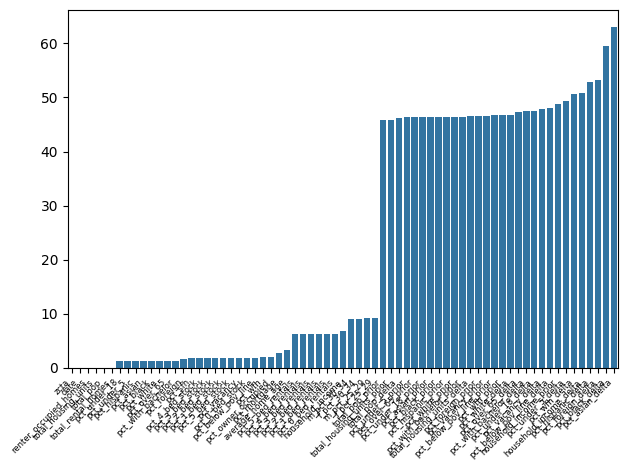

In [172]:
ax3 = sns.barplot((cen.isna().sum()/cen.shape[0]*100).sort_values())
ax3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=6)
plt.tight_layout()
plt.show()

<Axes: >

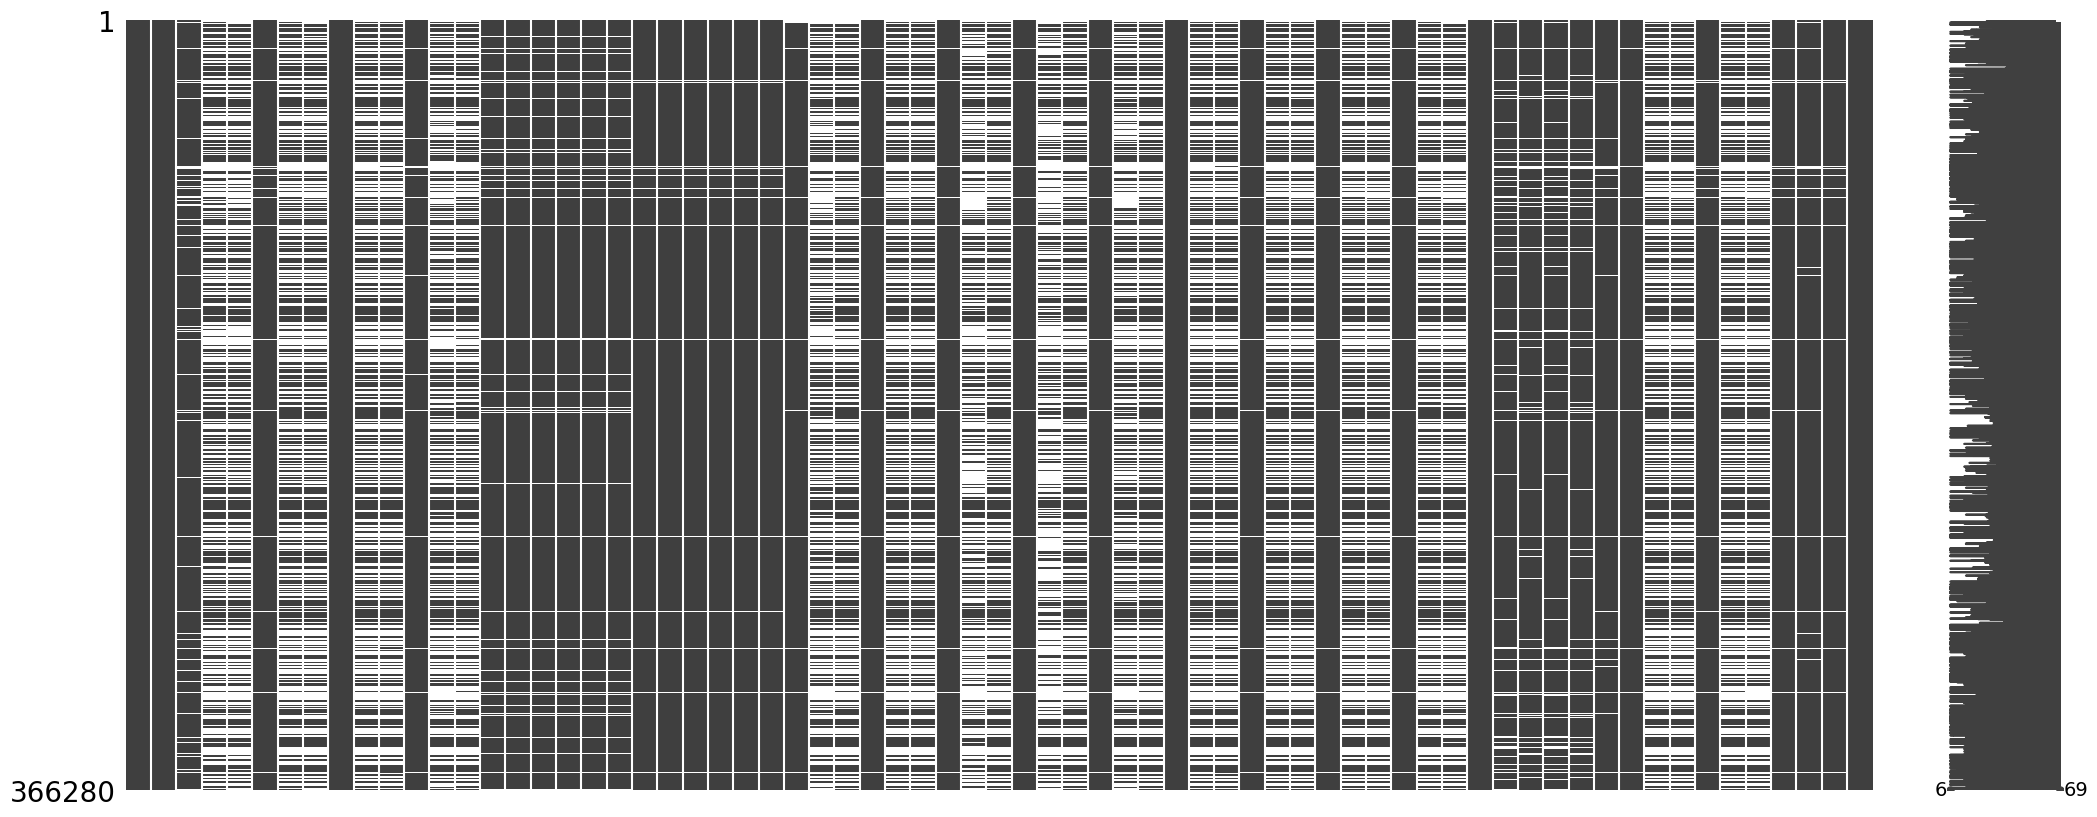

In [173]:
msno.matrix(cen)

In [174]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366280 entries, 0 to 366279
Data columns (total 69 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   zcta                       366280 non-null  int64  
 1   date                       366280 non-null  int64  
 2   household_income           340996 non-null  float64
 3   household_income_prior     187685 non-null  float64
 4   household_income_delta     180337 non-null  float64
 5   pct_below_pov_line         359296 non-null  float64
 6   pct_below_pov_line_prior   195177 non-null  float64
 7   pct_below_pov_line_delta   190419 non-null  float64
 8   total_pop                  366280 non-null  int64  
 9   total_pop_delta            197023 non-null  float64
 10  total_pop_prior            198127 non-null  float64
 11  pct_wfh                    358975 non-null  float64
 12  pct_wfh_delta              181032 non-null  float64
 13  pct_wfh_prior              19

# HMDA (credit, loan, mortgage)

In [175]:
hmda = pd.read_csv("Untitled/HMDA.csv")
hmda.head()

,Unnamed: 0,X,zcta,total_loan_applications,total_loan_origination,total_loans_denials,total_gov_loans_originated,total_conv_loans_originated,total_first_loans_originated,total_second_loans_originated,...,debt_to_income,loan_to_value,pct_high_ltv,pct_very_high_ltv,avg_first_lien_ir,pct_cash_out_refinance,pct_investor_loans,pct_second_loans,avg_loan_amt,date
0,1,1,0.0,143,86,30,13,73,81,5,...,0.36,0.72,0.36,0.24,5.22,0.14,0.03,0.13,246000.0,201801
1,2,2,1001.0,744,470,149,64,406,385,85,...,0.37,0.69,0.39,0.24,4.59,0.13,0.03,0.00,173000.0,201801
2,3,3,1002.0,475,311,75,6,305,281,30,...,0.36,0.67,0.22,0.08,4.29,0.15,0.08,0.02,265000.0,201801
3,4,4,1003.0,1,1,0,0,1,1,0,...,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,375000.0,201801
4,5,5,1005.0,188,115,46,31,84,87,28,...,0.39,0.75,0.48,0.39,4.68,0.13,0.02,0.03,194000.0,201801


In [176]:
hmda.shape

(118526, 28)

In [177]:
hmda.isna().sum()

Unnamed: 0                               0
X                                        0
zcta                                     6
total_loan_applications                  0
total_loan_origination                   0
total_loans_denials                      0
total_gov_loans_originated               0
total_conv_loans_originated              0
total_first_loans_originated             0
total_second_loans_originated            0
total_cash_out_refinances                0
total_investment_property_mortgages      0
total_second_property_mortgages          0
pct_loan_denials                        66
pct_gov_loans                          425
pct_conv_loans                         425
pct_first_lien                         425
pct_second_lien                        425
debt_to_income                           0
loan_to_value                            0
pct_high_ltv                           425
pct_very_high_ltv                      425
avg_first_lien_ir                        0
pct_cash_ou

In [178]:
hmda.columns

Index(['Unnamed: 0', 'X', 'zcta', 'total_loan_applications',
       'total_loan_origination', 'total_loans_denials',
       'total_gov_loans_originated', 'total_conv_loans_originated',
       'total_first_loans_originated', 'total_second_loans_originated',
       'total_cash_out_refinances', 'total_investment_property_mortgages',
       'total_second_property_mortgages', 'pct_loan_denials', 'pct_gov_loans',
       'pct_conv_loans', 'pct_first_lien', 'pct_second_lien', 'debt_to_income',
       'loan_to_value', 'pct_high_ltv', 'pct_very_high_ltv',
       'avg_first_lien_ir', 'pct_cash_out_refinance', 'pct_investor_loans',
       'pct_second_loans', 'avg_loan_amt', 'date'],
      dtype='object')

<Axes: >

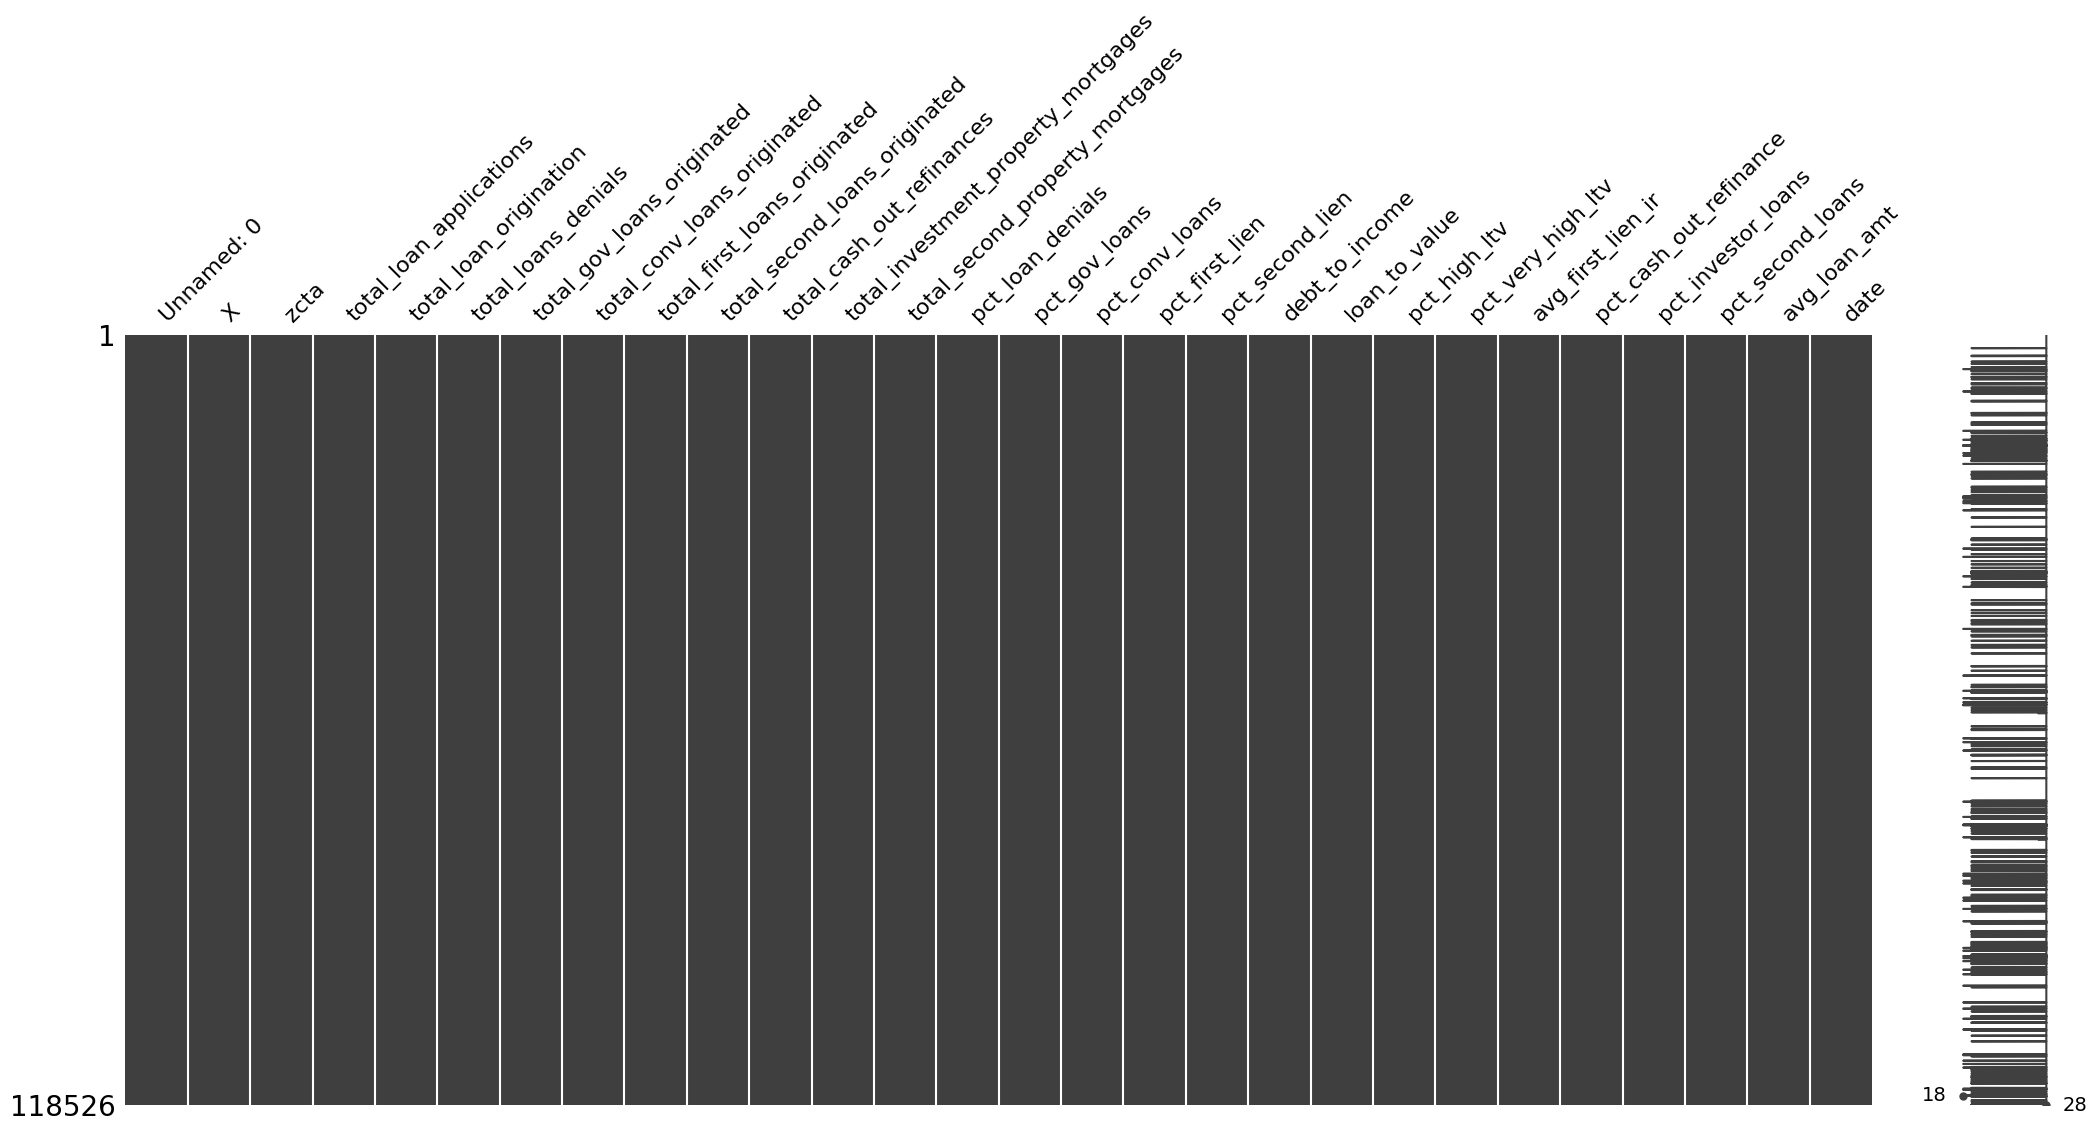

In [179]:
msno.matrix(hmda)

# HUD (rental for HUD)

In [180]:
hud = pd.read_csv("Untitled/hud.csv")
hud.head()

,zcta,hud_0_bed,hud_1_bed,hud_2_bed,hud_3_bed,hud_4_bed,date,total_units_HUD,total_units_S8,pct_occupied_S8,s8_rate
0,76437,570,590,780,1030,1320,202001,95.0,8.0,NaN,NaN
1,76443,580,600,780,1050,1340,202001,36.0,6.0,NaN,NaN
2,76464,570,590,780,1030,1320,202001,NaN,NaN,NaN,NaN
3,76469,590,610,800,1080,1370,202001,NaN,NaN,NaN,NaN
4,79501,700,720,940,1260,1610,202001,82.0,0.0,NaN,NaN


In [181]:
hud.shape

(138084, 11)

In [182]:
hud.isna().sum()

zcta                   0
hud_0_bed              0
hud_1_bed              0
hud_2_bed              0
hud_3_bed              0
hud_4_bed              0
date                   0
total_units_HUD    49625
total_units_S8     49625
pct_occupied_S8    83178
s8_rate            83178
dtype: int64

In [183]:
hud.columns

Index(['zcta', 'hud_0_bed', 'hud_1_bed', 'hud_2_bed', 'hud_3_bed', 'hud_4_bed',
       'date', 'total_units_HUD', 'total_units_S8', 'pct_occupied_S8',
       's8_rate'],
      dtype='object')

<Axes: >

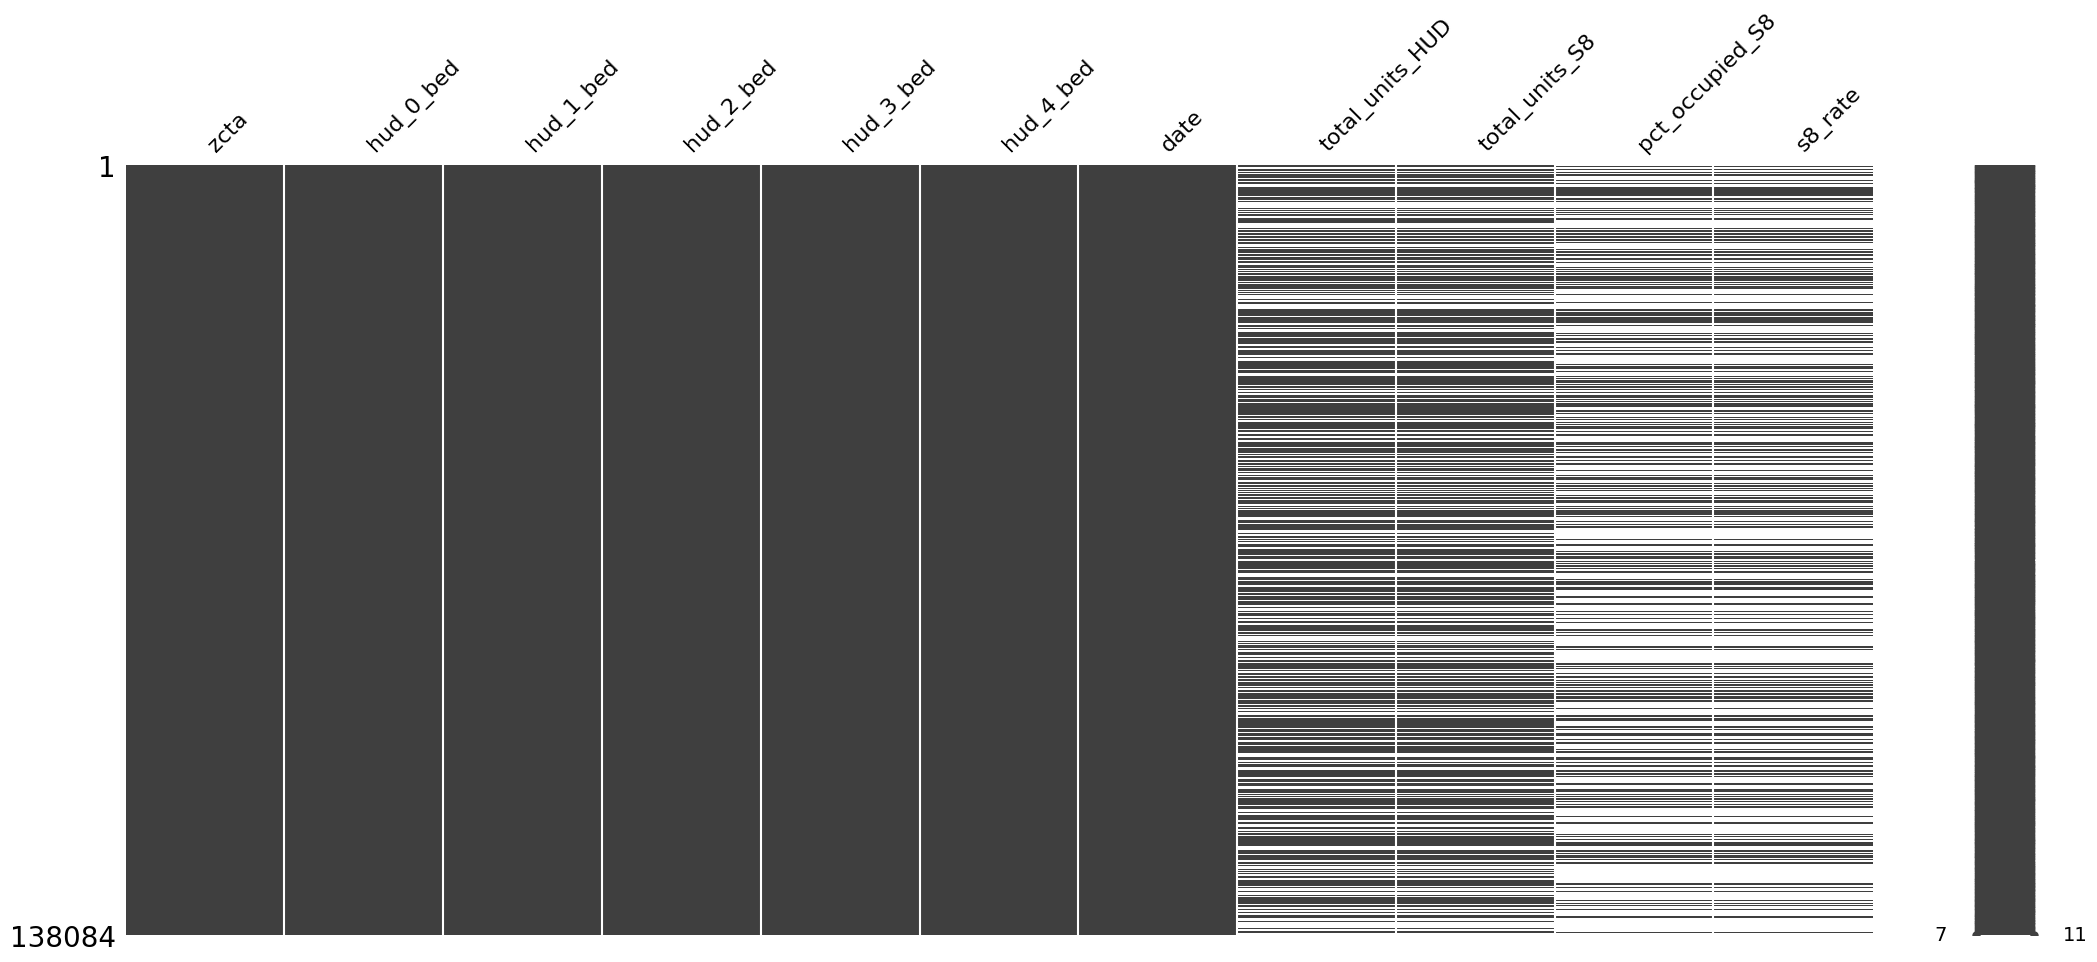

In [184]:
msno.matrix(hud)

# MONTHLY REALTOR (listing prices)

In [185]:
real = pd.read_csv("Untitled/monthly_realtor_metrics_combined.csv")
real.head()

,zcta,date,median_listing_price,active_listing_count,median_days_on_market,total_listing_count,new_listing_count,price_drops_pct_of_inventory,price_reduced_count,average_listing_price,median_listing_price_per_square_foot,active_listing_count_historical,total_listing_count_yy_smoothed,median_days_on_market_yy_smoothed,median_listing_price_yy_smoothed,average_listing_price_yy_smoothed
0,8108,201607,230000.0,97.0,62.0,146.0,36.0,0.45,44.0,251000.0,156.0,26.0,NaN,NaN,NaN,NaN
1,56368,201607,235000.0,36.0,67.0,50.0,12.0,0.11,4.0,249000.0,151.0,13.0,NaN,NaN,NaN,NaN
2,46615,201607,70000.0,79.0,53.0,79.0,36.0,0.25,20.0,83000.0,56.0,27.0,NaN,NaN,NaN,NaN
3,84061,201607,1280000.0,2.0,218.0,3.0,0.0,0.00,0.0,1280000.0,471.0,3.0,NaN,NaN,NaN,NaN
4,37151,201607,170000.0,4.0,78.0,4.0,0.0,0.00,0.0,177000.0,73.0,1.0,NaN,NaN,NaN,NaN


In [186]:
real.shape

(3114037, 16)

In [187]:
real.isna().sum()

zcta                                         0
date                                         0
median_listing_price                      7684
active_listing_count                      4732
median_days_on_market                    29214
total_listing_count                       3281
new_listing_count                         3281
price_drops_pct_of_inventory             44891
price_reduced_count                       3281
average_listing_price                     7684
median_listing_price_per_square_foot     30060
active_listing_count_historical             13
total_listing_count_yy_smoothed         457903
median_days_on_market_yy_smoothed       475363
median_listing_price_yy_smoothed        459641
average_listing_price_yy_smoothed       459641
dtype: int64

In [188]:
real.columns

Index(['zcta', 'date', 'median_listing_price', 'active_listing_count',
       'median_days_on_market', 'total_listing_count', 'new_listing_count',
       'price_drops_pct_of_inventory', 'price_reduced_count',
       'average_listing_price', 'median_listing_price_per_square_foot',
       'active_listing_count_historical', 'total_listing_count_yy_smoothed',
       'median_days_on_market_yy_smoothed', 'median_listing_price_yy_smoothed',
       'average_listing_price_yy_smoothed'],
      dtype='object')

In [189]:
real.columns[(real.isna().sum()/real.shape[0]*100 < 10)]

Index(['zcta', 'date', 'median_listing_price', 'active_listing_count',
       'median_days_on_market', 'total_listing_count', 'new_listing_count',
       'price_drops_pct_of_inventory', 'price_reduced_count',
       'average_listing_price', 'median_listing_price_per_square_foot',
       'active_listing_count_historical'],
      dtype='object')

/var/folders/zc/mksf7bnd14j5w72qpcwrq_yh0000gn/T/ipykernel_66525/1525500532.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')


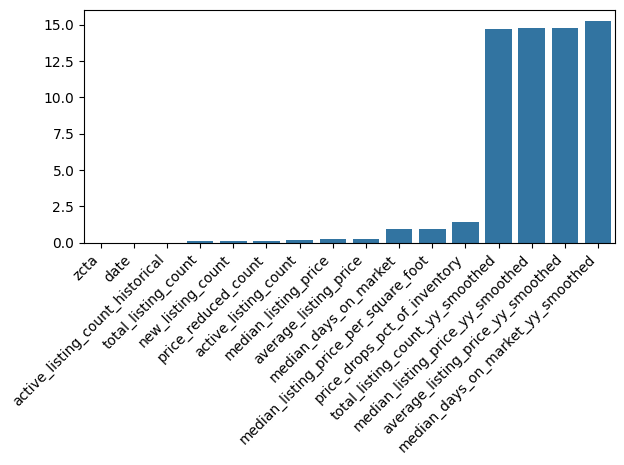

In [190]:
ax2 = sns.barplot((real.isna().sum()/real.shape[0]*100).sort_values())
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: >

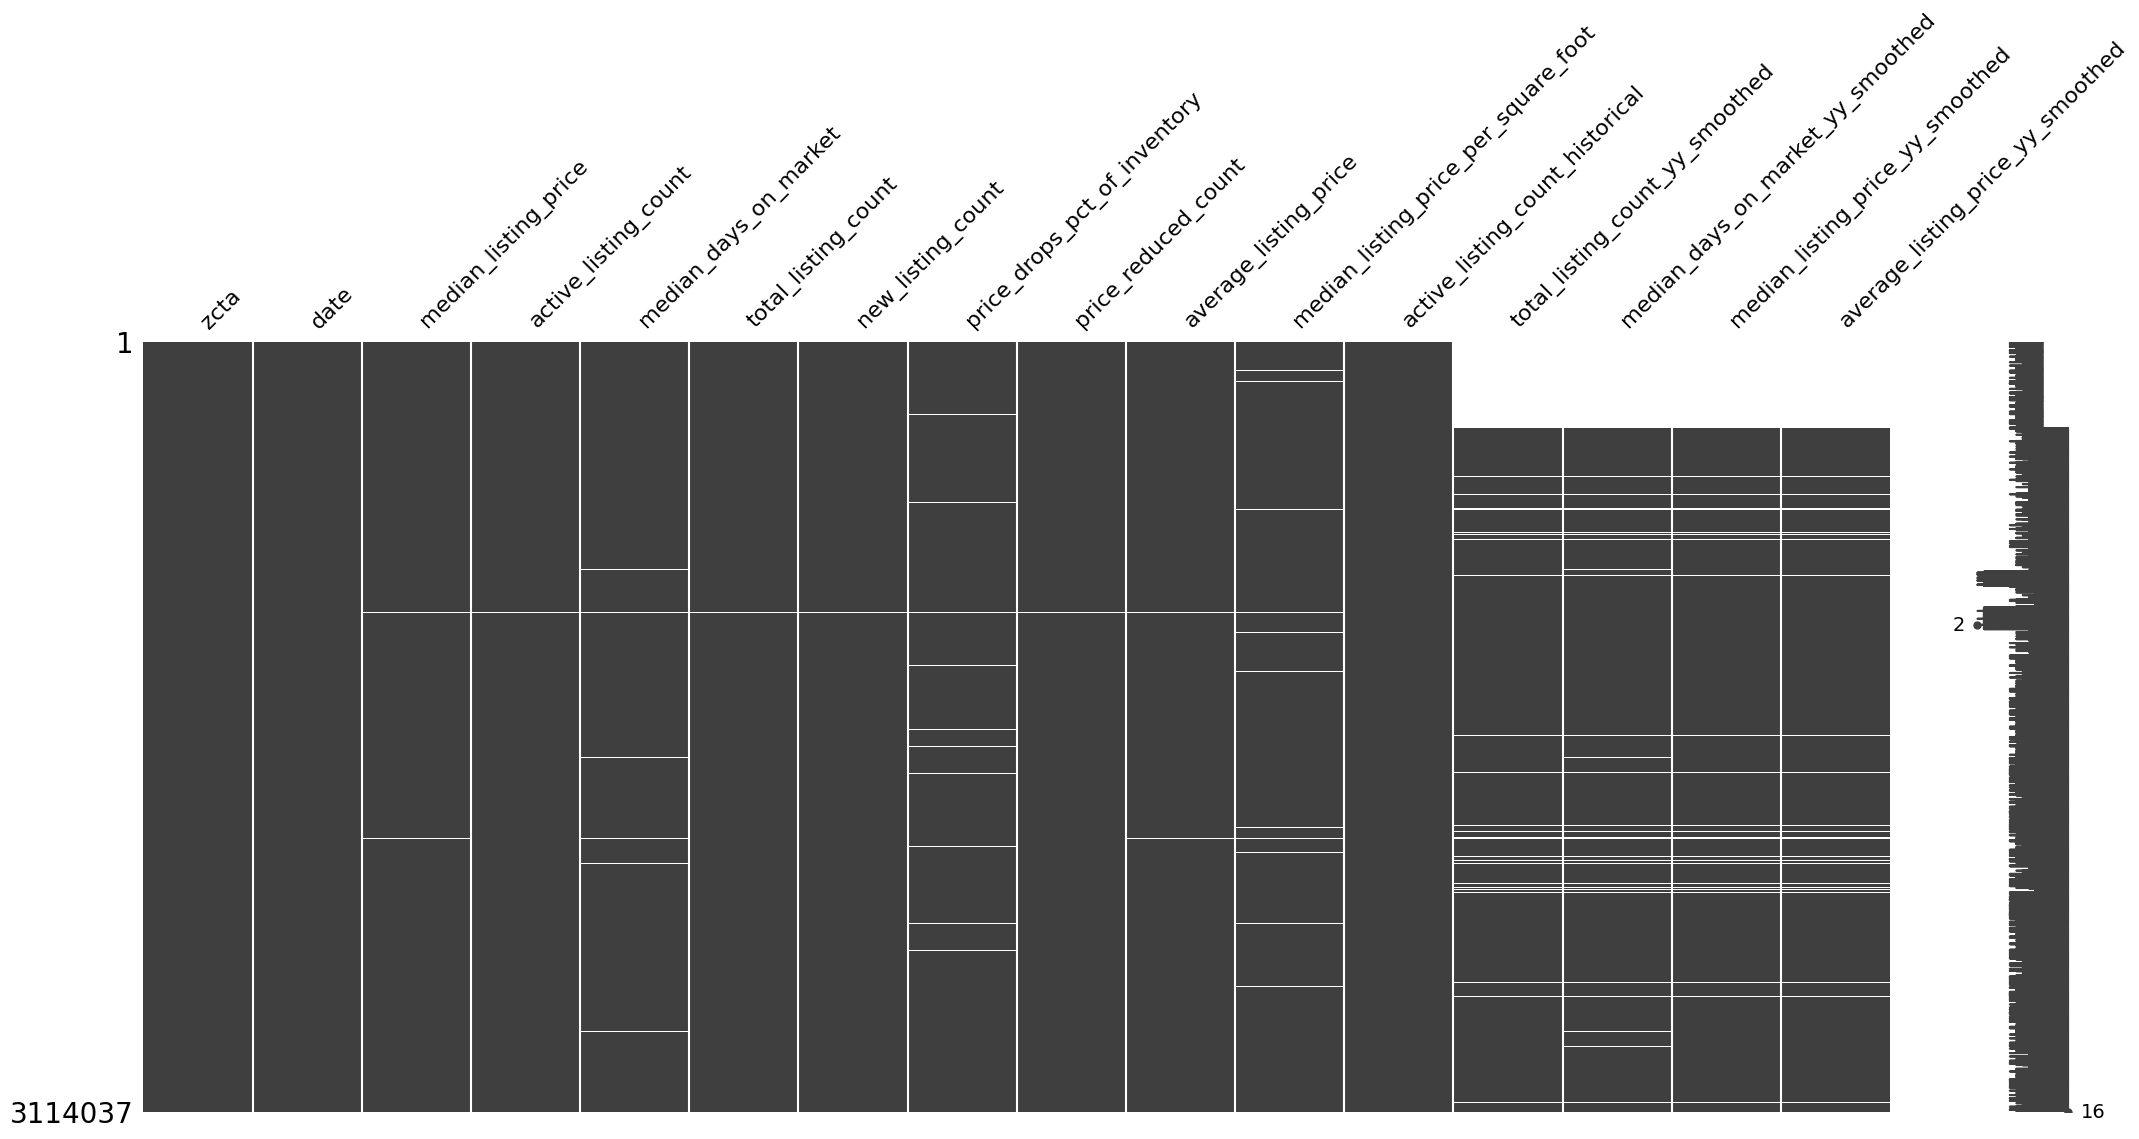

In [191]:
msno.matrix(real)

# RENT METRICS (rent prices)

In [192]:
rent = pd.read_csv("Untitled/rent_metrics.csv")
rent.head()

,zcta,date,averageRent,averageRent_0_bed,averageRent_1_bed,averageRent_2_bed,averageRent_3_bed,averageRent_4_bed,medianRent,medianRentPerSquareFoot,...,medianRent_2_bed,medianRent_3_bed,medianRent_4_bed,medianRentalDaysOnMarket,totalRentalListings,totalRentalListings_0_bed,totalRentalListings_1_bed,totalRentalListings_2_bed,totalRentalListings_3_bed,totalRentalListings_4_bed
0,1001,202004,1590.0,745.0,1220.0,1520.0,1700.0,2750.0,NaN,NaN,...,NaN,NaN,NaN,NaN,21.0,1.0,2.0,12.0,5.0,1.0
1,1001,202005,1710.0,NaN,1120.0,1570.0,1650.0,2500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,25.0,NaN,3.0,14.0,6.0,2.0
2,1001,202006,1720.0,NaN,1120.0,1550.0,1700.0,2500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,27.0,NaN,3.0,15.0,7.0,2.0
3,1001,202007,1690.0,NaN,1010.0,1540.0,1700.0,2500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,23.0,NaN,2.0,13.0,6.0,2.0
4,1001,202008,1660.0,NaN,1010.0,1540.0,1580.0,2500.0,NaN,NaN,...,NaN,NaN,NaN,NaN,22.0,NaN,2.0,13.0,5.0,2.0


In [193]:
rent.shape

(1118976, 27)

In [194]:
rent.isna().sum()

zcta                                   0
date                                   0
averageRent                       117290
averageRent_0_bed                 756417
averageRent_1_bed                 465135
averageRent_2_bed                 313966
averageRent_3_bed                 291370
averageRent_4_bed                 495544
medianRent                        927579
medianRentPerSquareFoot           936687
medianRentPerSquareFoot_0_bed    1099491
medianRentPerSquareFoot_1_bed    1007376
medianRentPerSquareFoot_2_bed     974972
medianRentPerSquareFoot_3_bed     965823
medianRentPerSquareFoot_4_bed    1002966
medianRent_0_bed                 1093113
medianRent_1_bed                  994355
medianRent_2_bed                  965682
medianRent_3_bed                  959236
medianRent_4_bed                  998048
medianRentalDaysOnMarket          930538
totalRentalListings               117290
totalRentalListings_0_bed         756417
totalRentalListings_1_bed         465135
totalRentalListi

In [195]:
rent.columns

Index(['zcta', 'date', 'averageRent', 'averageRent_0_bed', 'averageRent_1_bed',
       'averageRent_2_bed', 'averageRent_3_bed', 'averageRent_4_bed',
       'medianRent', 'medianRentPerSquareFoot',
       'medianRentPerSquareFoot_0_bed', 'medianRentPerSquareFoot_1_bed',
       'medianRentPerSquareFoot_2_bed', 'medianRentPerSquareFoot_3_bed',
       'medianRentPerSquareFoot_4_bed', 'medianRent_0_bed', 'medianRent_1_bed',
       'medianRent_2_bed', 'medianRent_3_bed', 'medianRent_4_bed',
       'medianRentalDaysOnMarket', 'totalRentalListings',
       'totalRentalListings_0_bed', 'totalRentalListings_1_bed',
       'totalRentalListings_2_bed', 'totalRentalListings_3_bed',
       'totalRentalListings_4_bed'],
      dtype='object')

/var/folders/zc/mksf7bnd14j5w72qpcwrq_yh0000gn/T/ipykernel_66525/3021330304.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


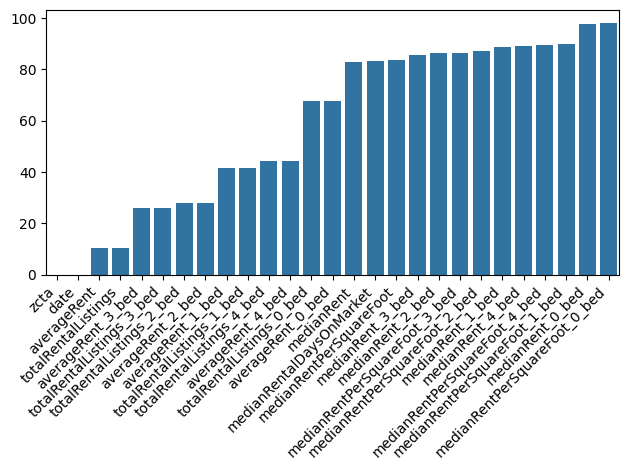

In [196]:
ax = sns.barplot((rent.isna().sum()/rent.shape[0]*100).sort_values())
ax = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: >

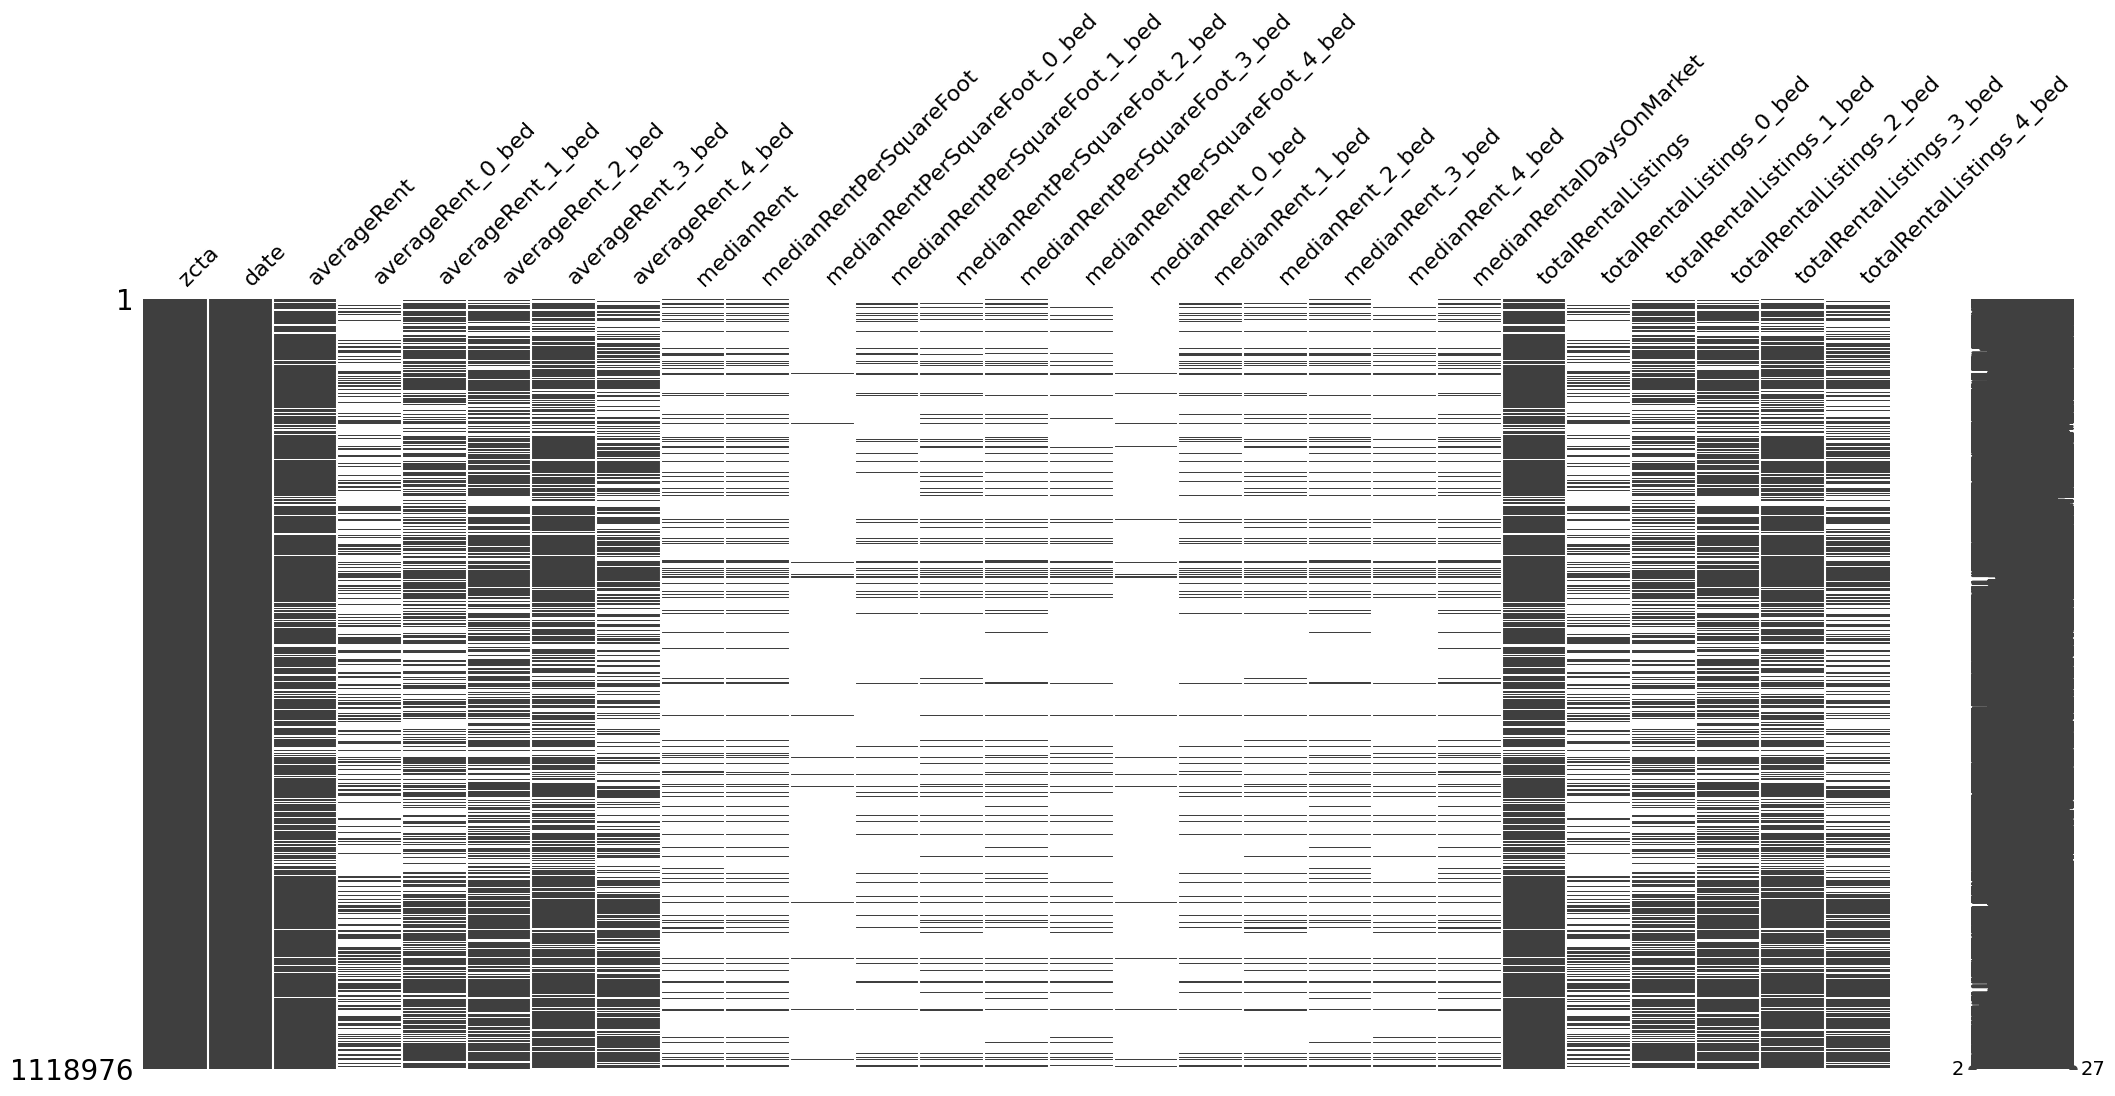

In [197]:
msno.matrix(rent)

# ZILLOW MONTHLY (monhtly housing value)

In [198]:
mth = pd.read_csv("Untitled/zillow_monthly.csv")
mth.head()

,zcta,date,value_1_bed,value_2_bed,value_3_bed,value_4_bed,value_5_bed,all_homes,all_sfh,all_condo,all_homes_projections,all_homes_prior,all_homes_yy_smoothed,all_homes_200701,all_homes_201201,dollar_drop_2007_2012
0,1001,200501,NaN,154000.0,201000.0,220000.0,232000.0,185000.0,198000.0,147000.0,NaN,164000.0,0.1340,213000.0,185000.0,-0.1310
1,1002,200501,NaN,193000.0,273000.0,364000.0,451000.0,296000.0,317000.0,191000.0,NaN,259000.0,0.1470,320000.0,291000.0,-0.0906
2,1005,200501,NaN,209000.0,228000.0,268000.0,NaN,224000.0,224000.0,NaN,NaN,201000.0,0.1080,234000.0,173000.0,-0.2610
3,1007,200501,NaN,188000.0,259000.0,307000.0,330000.0,258000.0,263000.0,NaN,NaN,228000.0,0.1330,288000.0,248000.0,-0.1390
4,1008,200501,NaN,146000.0,197000.0,231000.0,NaN,175000.0,177000.0,NaN,NaN,165000.0,0.0468,215000.0,191000.0,-0.1120


In [199]:
# rows and columns 
mth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525620 entries, 0 to 6525619
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   zcta                   int64  
 1   date                   int64  
 2   value_1_bed            float64
 3   value_2_bed            float64
 4   value_3_bed            float64
 5   value_4_bed            float64
 6   value_5_bed            float64
 7   all_homes              float64
 8   all_sfh                float64
 9   all_condo              float64
 10  all_homes_projections  float64
 11  all_homes_prior        float64
 12  all_homes_yy_smoothed  float64
 13  all_homes_200701       float64
 14  all_homes_201201       float64
 15  dollar_drop_2007_2012  float64
dtypes: float64(14), int64(2)
memory usage: 796.6 MB


In [200]:
mth['date'] = pd.to_datetime(mth['date'], format='%Y%m')
mth['date'].dtype

dtype('<M8[ns]')

In [218]:
# predictors
mth.columns

Index(['zcta', 'date', 'value_2_bed', 'value_3_bed', 'value_4_bed',
       'all_homes', 'all_sfh', 'all_homes_prior', 'all_homes_yy_smoothed',
       'all_homes_200701', 'all_homes_201201', 'dollar_drop_2007_2012',
       'month'],
      dtype='object')

Predictors:
1. zcta - area 
2. date 
3. value_X_bed - reflects the typical value for X-bedroom homes in the 35th to 65th percentile range
4. all_homes -  reflects the typical value for homes in the 35th to 65th percentile range.  
5. all_sfh - reflects the typical value for single family homes in the 35th to 65th percentile range.  
6. all_condo - reflects the typical value for condos in the 35th to 65th percentile range.  
7. all_homes_projections - 1-year home price projection based on Zillow's estimates
8. all_homes_prior - prior home price one year ago. 
9. all_homes_yy_smoothed - year over year growth rate in the area's typical home value (in pct)
10. all_homes_200701, all_homes_201201, dollar_drop_2007_2012 - to account for dollar drop 

In [219]:
# confirming all_homes_prior definition
print(mth.loc[(mth['zcta'] == 1001) & (mth['date'] == '2005-01-01'), 'all_homes'])
print(mth.loc[(mth['zcta'] == 1001) & (mth['date'] == '2006-01-01'), 'all_homes_prior'])

0    185000.0
Name: all_homes, dtype: float64
315756    185000.0
Name: all_homes_prior, dtype: float64


In [220]:
mth.describe()

,zcta,date,value_2_bed,value_3_bed,value_4_bed,all_homes,all_sfh,all_homes_prior,all_homes_yy_smoothed,all_homes_200701,all_homes_201201,dollar_drop_2007_2012,month
count,6.525620e+06,6525620,3.304505e+06,4.362632e+06,3.318709e+06,5.336900e+06,5.304935e+06,5.198016e+06,5.165314e+06,3.863095e+06,5.114007e+06,3.860119e+06,6.525620e+06
mean,4.830668e+04,2015-04-16 22:58:38.266524160,2.028200e+05,2.612718e+05,3.666529e+05,2.536035e+05,2.629981e+05,2.456205e+05,4.382183e-02,2.541146e+05,1.798043e+05,-1.945448e-01,6.435483e+00
min,1.001000e+03,2005-01-01 00:00:00,8.000000e+03,9.000000e+03,1.000000e+04,7.000000e+03,7.000000e+03,7.000000e+03,-5.500000e-01,8.000000e+03,9.000000e+03,-7.910000e-01,1.000000e+00
25%,2.596900e+04,2010-02-01 00:00:00,9.500000e+04,1.330000e+05,1.880000e+05,1.250000e+05,1.260000e+05,1.220000e+05,1.130000e-03,1.230000e+05,9.900000e+04,-2.970000e-01,3.000000e+00
50%,4.783400e+04,2015-04-01 00:00:00,1.500000e+05,1.940000e+05,2.770000e+05,1.870000e+05,1.890000e+05,1.810000e+05,4.120000e-02,1.900000e+05,1.390000e+05,-1.680000e-01,6.000000e+00
75%,7.035800e+04,2020-06-01 00:00:00,2.450000e+05,3.040000e+05,4.280000e+05,2.990000e+05,3.050000e+05,2.880000e+05,8.310000e-02,3.140000e+05,2.070000e+05,-6.670000e-02,9.000000e+00
max,9.992900e+04,2025-08-01 00:00:00,3.591000e+06,5.977000e+06,1.053700e+07,8.070000e+06,1.062400e+07,8.070000e+06,8.970000e-01,3.566000e+06,3.123000e+06,7.220000e-01,1.200000e+01
std,2.738787e+04,NaN,1.846419e+05,2.424132e+05,3.485053e+05,2.365264e+05,2.673670e+05,2.274591e+05,8.046085e-02,2.115599e+05,1.498694e+05,1.789564e-01,3.438967e+00


In [217]:
# checking for missing values
mth.isna().sum()/(mth.shape[0])*100

zcta                      0.000000
date                      0.000000
value_2_bed              49.361057
value_3_bed              33.146092
value_4_bed              49.143392
all_homes                18.216200
all_sfh                  18.706039
all_homes_prior          20.344488
all_homes_yy_smoothed    20.845621
all_homes_200701         40.801104
all_homes_201201         21.631860
dollar_drop_2007_2012    40.846709
month                     0.000000
dtype: float64

/var/folders/zc/mksf7bnd14j5w72qpcwrq_yh0000gn/T/ipykernel_66525/1243921594.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


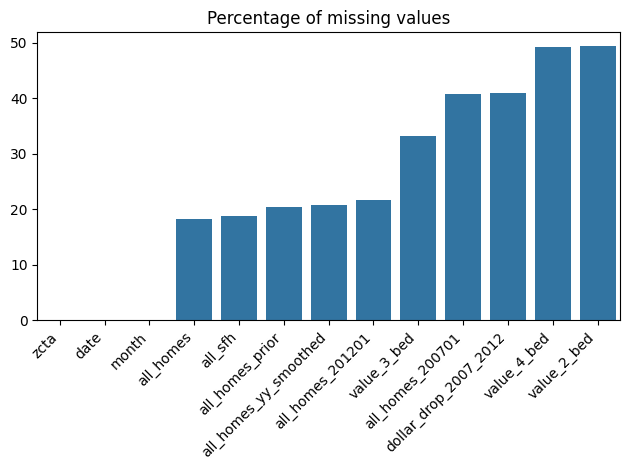

In [221]:
# missing values 
ax1 = sns.barplot((mth.isna().sum()/mth.shape[0]*100).sort_values())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.set_title("Percentage of missing values")
plt.tight_layout()
plt.show()

<Axes: >

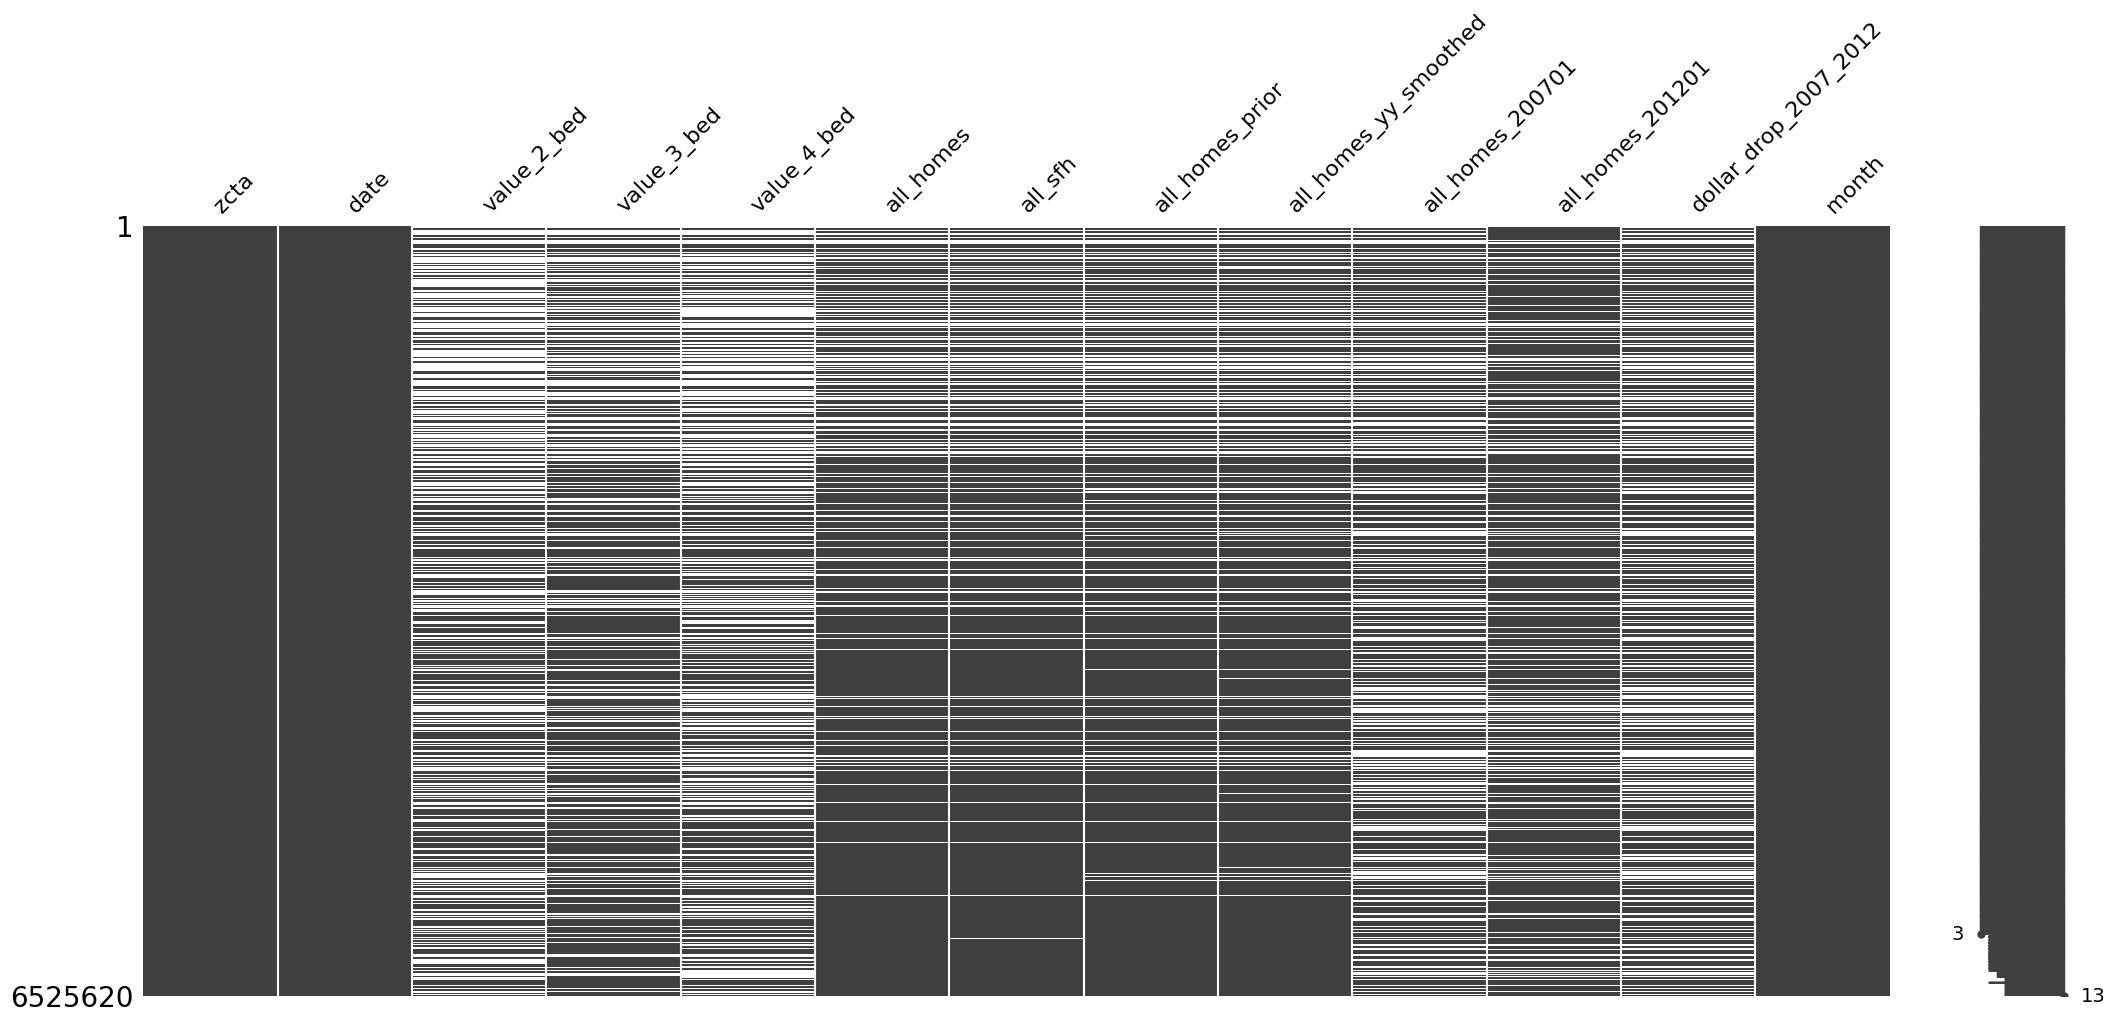

In [222]:
# missing values
msno.matrix(mth)

note: use demographics data to check if MAR or MCAR

In [223]:
# dropping columns with over 50% missing values
mth.drop(columns = ['all_homes_projections', 'all_condo', 'value_5_bed', 'value_1_bed'], inplace = True)

KeyError: "['all_homes_projections', 'all_condo', 'value_5_bed', 'value_1_bed'] not found in axis"

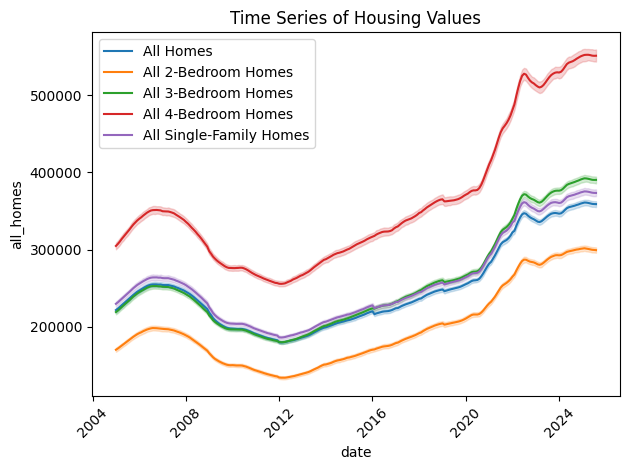

In [ ]:
# time series by type of housing
sns.lineplot(data = mth, x = 'date', y = 'all_homes', label = 'All Homes')
sns.lineplot(data = mth, x = 'date', y = 'value_2_bed', label = 'All 2-Bedroom Homes')
sns.lineplot(data = mth, x = 'date', y = 'value_3_bed', label = 'All 3-Bedroom Homes')
sns.lineplot(data = mth, x = 'date', y = 'value_4_bed', label = 'All 4-Bedroom Homes')
sns.lineplot(data = mth, x = 'date', y = 'all_sfh', label = 'All Single-Family Homes')
plt.title('Time Series of Housing Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

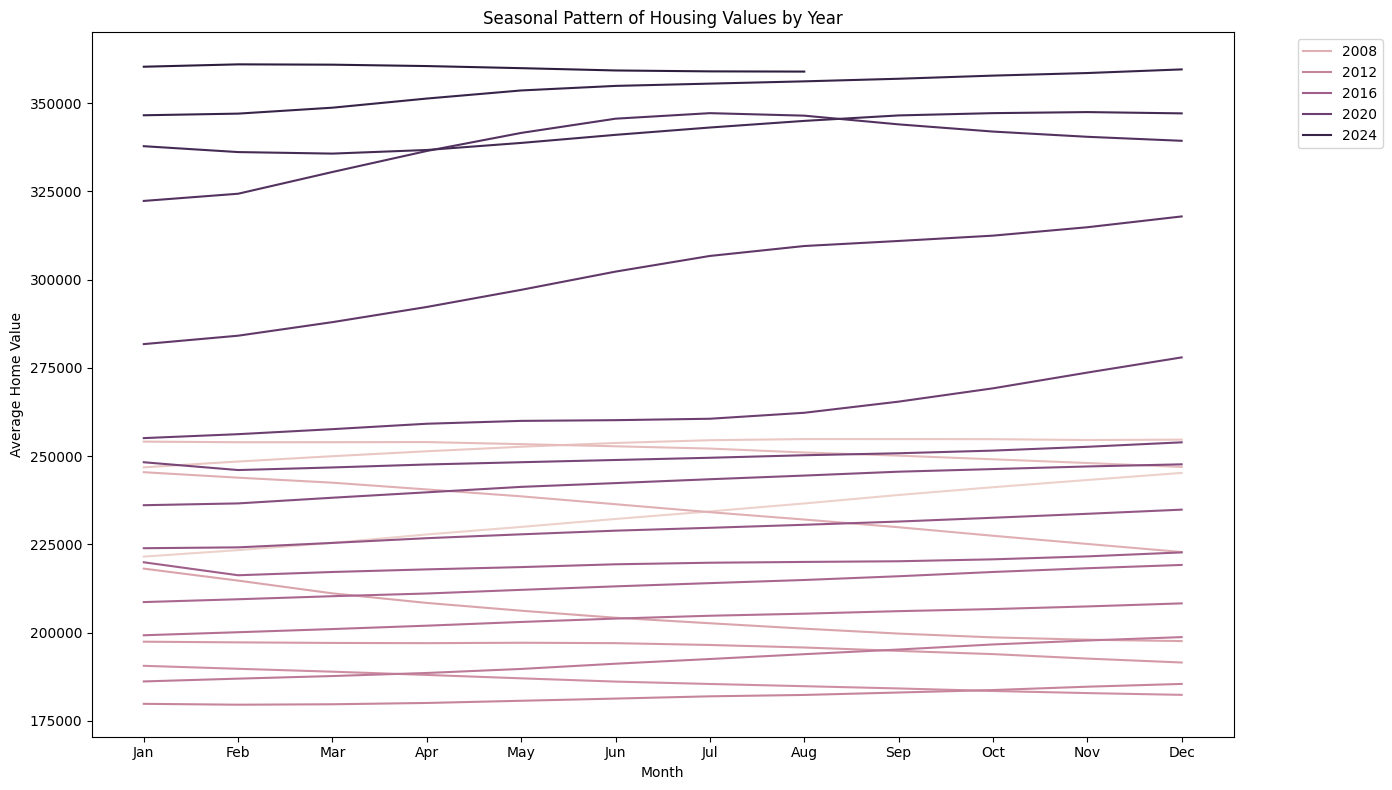

In [ ]:
# seasonal time series by year (hue)
mth['month'] = mth['date'].dt.month

plt.figure(figsize=(14, 8))
sns.lineplot(data=mth, x='month', y='all_homes', hue=mth['date'].dt.year, 
             estimator='mean', errorbar=None)
plt.title('Seasonal Pattern of Housing Values by Year')
plt.xlabel('Month')
plt.ylabel('Average Home Value')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

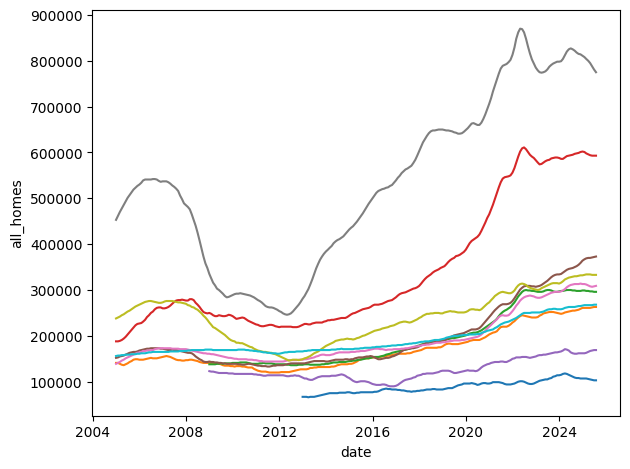

In [ ]:
# time series by random zcta 
random_sample = mth['zcta'].sample(n=10)

for zcta in random_sample:
    sns.lineplot(data = mth[mth['zcta'] == zcta], x = 'date', y = 'all_homes')
plt.tight_layout()
plt.show()

note: fluctuating year-by-year home value for different areas 

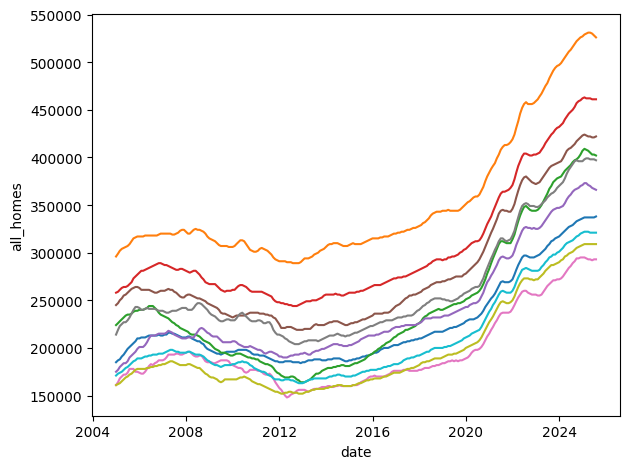

In [ ]:
# time series by most temporal coverage (looking at zcta with the most data recorded)
zcta_date_range = mth.groupby('zcta')['date'].agg(['min', 'max', 'count'])
zcta_counts = zcta_date_range.head(10).index

for zcta in zcta_counts:
    sns.lineplot(data = mth[mth['zcta'] == zcta], x = 'date', y = 'all_homes')
plt.tight_layout()
plt.show()

In [ ]:
# zcta performance comparison 
zcta_dates = mth.groupby('zcta')['date'].agg(['min', 'max'])
zcta_values = mth.groupby('zcta')['all_homes'].agg(['first', 'last'])

zcta_growth = ((zcta_values['last'] - zcta_values['first']) / zcta_values['first'] * 100).sort_values(ascending=False)
zcta_results = pd.DataFrame({
    'growth_rate': zcta_growth,
    'start_date': zcta_dates['min'],
    'end_date': zcta_dates['max']
}).sort_values('growth_rate', ascending=False)

print("Top 10 ZCTAs by growth rate:")
print(zcta_results.head(10))

Top 10 ZCTAs by growth rate:
       growth_rate start_date   end_date
zcta                                    
42076  1971.428571 2005-01-01 2025-08-01
43222   537.037037 2005-01-01 2025-08-01
35773   486.666667 2005-01-01 2025-08-01
48219   481.250000 2005-01-01 2025-08-01
10039   432.743363 2005-01-01 2025-08-01
42726   417.647059 2005-01-01 2025-08-01
53233   407.692308 2005-01-01 2025-08-01
66104   403.030303 2005-01-01 2025-08-01
14210   400.000000 2005-01-01 2025-08-01
93591   385.897436 2005-01-01 2025-08-01


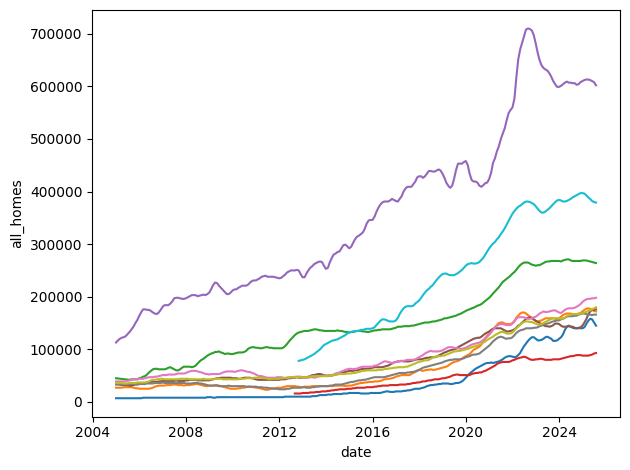

In [ ]:
for zcta in zcta_results.head(10).index:
    sns.lineplot(data = mth[mth['zcta'] == zcta], x = 'date', y = 'all_homes')
plt.tight_layout()
plt.show()

note: zcta's with the highest growth were not affected much by 2007-2012 dollar drop

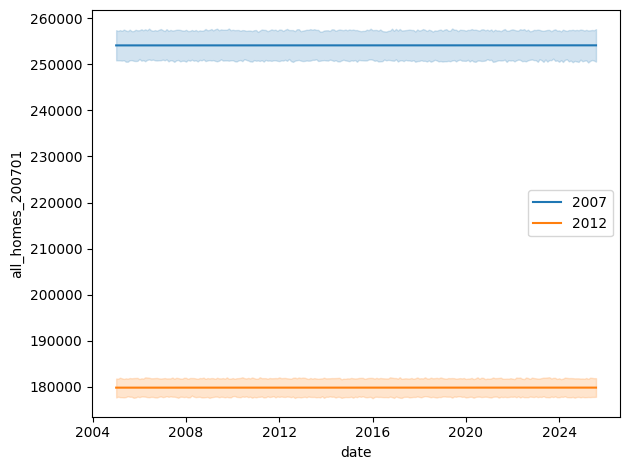

In [ ]:
# understanding all_homes_200701 and all_homes_201201 predictors
sns.lineplot(data = mth, x = 'date', y = 'all_homes_200701', label = '2007')
sns.lineplot(data = mth, x = 'date', y = 'all_homes_201201', label = '2012')
plt.legend()
plt.tight_layout()
plt.show()

Final notes: 
1. Grouping ZCTA into regions 
2. finding general longitude and latitude of ZCTA 
3. ZCTA clustering
4. merging with demographics data 